<a href="https://colab.research.google.com/github/rewpak/AI-works/blob/main/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6. Natural Language Processing
# Task 6.1 Sentiment Analysis
# Problem Descriptions

In sentiment analysis the goal is to classify a text as having either
Positive or Negative sentiment. For example, “This movie was poorly written and acted” should be considered Negative.

In this task, we will use the dataset “movie_reviews” with only 1000 positive and 1000 negative reviews.

Sentiment Analysis consist of following steps:

1. Collection of movie reviews with labels

  Positive sentiment is labeled as 0, and negative sentiment labeled as 1.
  
  positive (0)

  negative (1)

2.  Split the data into training set and testing set:

   training set (80%)

   testing set (20%)

3. Extract the word count features

   tf: term frequency

   tf-idf: tf weighted by inverse document frequency


4. Build the naïve Bayes classifier from the training set:

   For this task involving discrete data, we employ a Multinomial Naïve Bayes classifier. The choice of this classifier is apt for text classification due to its simplicity and effectiveness with word count features.

5. Apply the classifier on the testing data set:

   The Naïve Bayes classifier is built using the training set, and then it's applied to the testing data set to make predictions.

6. Evaluate the performance:

   The final step involves evaluating the model's performance. Common metrics such as accuracy, precision, recall, and F1-score are employed to assess how well the classifier distinguishes between positive and negative sentiments.


In [ ]:
!pip install nltk
import nltk
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Get the positive and negative review IDs
fileids_pos = movie_reviews.fileids('pos')
fileids_neg = movie_reviews.fileids('neg')

# Load the reviews
raw_data = []
for i in range(len(fileids_pos)):
  raw_data.append(movie_reviews.raw(fileids_pos[i]))
for i in range(len(fileids_neg)):
  raw_data.append(movie_reviews.raw(fileids_neg[i]))

# The corresponding labels for the reviews, 0 for postive, 1 for negative
labels = [0] * len(fileids_pos) + [1] * len(fileids_neg)

# Split the training and testing set by 80-20%
X_train, X_test, Y_train, Y_test = train_test_split(raw_data, labels, test_size=0.2)

In [ ]:
# Calculate the tf-idf features from the training set
tfidf = TfidfVectorizer(use_idf=False)
tfidf_data = tfidf.fit_transform(X_train)
print(tfidf_data.shape)

# Train the naive Bayes model for prediction
classifier = MultinomialNB().fit(tfidf_data, Y_train)

(1600, 36223)


In [ ]:
# Performance on the testing set
testing_tfidf = tfidf.transform(X_test)
predictions = classifier.predict(testing_tfidf)
print(metrics.classification_report(Y_test, predictions, target_names=['pos', 'neg']))

              precision    recall  f1-score   support

         pos       0.98      0.20      0.33       210
         neg       0.53      0.99      0.69       190

    accuracy                           0.58       400
   macro avg       0.75      0.60      0.51       400
weighted avg       0.76      0.58      0.50       400



In [ ]:
print(X_train[0])
print(testing_tfidf[0])

we could paraphrase michelle pfieffer's character in dangerous minds and say that beyond rangoon starts with an " a . " 
that's fair enough . 
all movies , like all school children , should be given the benefit of the doubt . 
the chance to succeed . 
after all , we like to think that the right combination of talent and effort can do wonders . 
mountains can be moved , and good movies can be made . 
yeah right . 
children fail , as do films . 
as does director john boorman's latest . 
the success of beyond rangoon hinges on the believability of patricia arquette ( ed wood , true romance ) as the busty westerner-in-peril wandering about 1988 burma without a passport . 
though we can stomach the mild plot contrivances that get her there , it's a tougher task to overlook the actress . 
she's a lightweight . 
as the first scene ( with narration ! ) 
demonstrates , she doesn't have * nearly * enough range for the emotions that her character--a mother fleeing the memories of a murdered husba

(-1.0, 1.0)

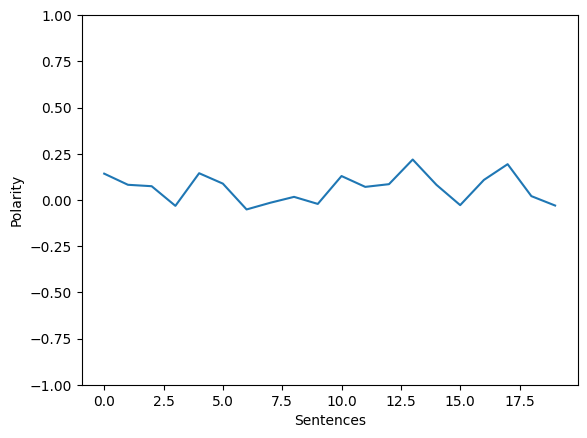

In [ ]:
# Evaluate the sentiment for each sentence in a review, and plot the variation of sentiment
import matplotlib.pyplot as plt

sentences = X_test[0].split('.')

testing_tfidf = tfidf.transform(sentences)
predictions = classifier.predict_proba(testing_tfidf)
polarity = [x[0] - x[1] for x in predictions]
# polarity = [x[0] if (x[0] > x[1]) else -x[1] for x in predictions]

plt.xlabel('Sentences')
plt.ylabel('Polarity')
plt.plot(polarity)
plt.ylim(-1, 1)

# Discussions

In this task, we classify a text as having either Positive or Negative sentiment. when we used use_idf=True, things looked pretty balanced. Both positive and negative sentiments had a good mix of precision and recall. The F1 scores, which kind of blend these two, were decent overall.

when we turned off the use_idf, it got a bit tricky. Precision for positive sentiments was high, however, recall was low – meaning we missed a bunch of positive instances. Negative sentiments were okay, with a balance between precision and recall. The overall F1-scores suffered, particularly in the case of the positive sentiments.